Put the data excel file in the same directory of the code

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import metrics
import seaborn as sns
import scipy.stats as st
from matplotlib import colors

In [2]:
if not os.path.exists('output_figures'):
    os.mkdir('output_figures')

In [3]:
def num2str_array(array):
    new_arr = []
    for x in array:
        try:
            new_arr.append(float(x))
        except:
            new_arr.append(np.nan)
    return np.array(new_arr)

In [4]:
data_test = pd.read_excel('Dataset_muSORS.xlsx', sheet_name='Fig. 4b-d, Fig. 5')
data_test = data_test.to_numpy()

In [5]:
subject_test = data_test[2:, 0]
sampling_point_test = data_test[2:, 1]
VPG_test = data_test[2:, 2]
y_true_1_test = num2str_array(data_test[2:, 3])
y_pred_1_test = num2str_array(data_test[2:, 4])
y_true_2_test = num2str_array(data_test[2:, 5])
y_pred_2_test = num2str_array(data_test[2:, 6])
subject_number_test = np.array([int(x[1:]) if not pd.isnull(x) else np.nan for x in subject_test])
subject_type_test = np.array([x[0] if not pd.isnull(x) else np.nan for x in subject_test])

In [6]:
ref_values_d_test_1 = y_true_1_test[subject_type_test == 'D']
ref_values_d_test_2 = y_true_2_test[subject_type_test == 'D']
ref_values_d_test = np.concatenate((ref_values_d_test_1, ref_values_d_test_2))
y_pred_1_test_d = y_pred_1_test[subject_type_test == 'D']
y_pred_2_test_d = y_pred_2_test[subject_type_test == 'D']
pred_values_d_test = np.concatenate((y_pred_1_test_d, y_pred_2_test_d))

In [7]:
ref_values_n_test_1 = y_true_1_test[subject_type_test == 'N']
ref_values_n_test_2 = y_true_2_test[subject_type_test == 'N']
ref_values_n_test = np.concatenate((ref_values_n_test_1, ref_values_n_test_2))
y_pred_1_test_n = y_pred_1_test[subject_type_test == 'N']
y_pred_2_test_n = y_pred_2_test[subject_type_test == 'N']
pred_values_n_test = np.concatenate((y_pred_1_test_n, y_pred_2_test_n))

In [8]:
sampling_point_test_d = sampling_point_test[subject_type_test == 'D']
sampling_point_test_n = sampling_point_test[subject_type_test == 'N']
sampling_point_d_test = np.tile(sampling_point_test_d, (2,))
sampling_point_n_test = np.tile(sampling_point_test_n, (2,))

In [9]:
color_list = sns.color_palette('deep')
color_dark_blue = '#1e2c5b'
sns.set_theme()
sns.set_style('whitegrid')

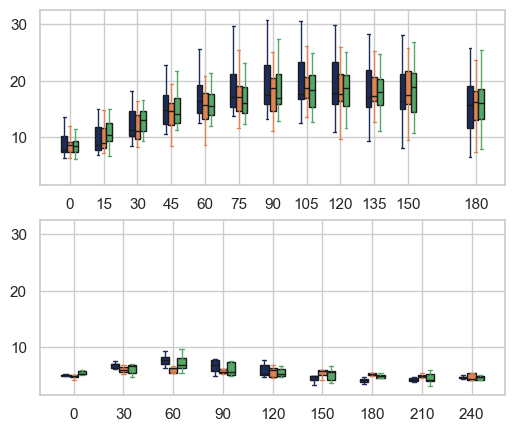

In [10]:
time_d = np.array([0,15,30,45,60,75,90,105,120,135,150,180])
plt.figure(figsize=(6, 5))
medianprops = dict(color='k')
plt.subplot(211)
bplots = [[] for i in range(3)]
bplots[0] = plt.boxplot([ref_values_d_test[sampling_point_d_test == i+1] for i in range(12)], \
            positions=time_d/15*3-0.5, notch=False, showfliers=False, patch_artist=True, \
            medianprops=medianprops, manage_ticks=False, boxprops=dict(facecolor=color_dark_blue, edgecolor='k'), \
            whiskerprops=dict(color=color_dark_blue), capprops=dict(color=color_dark_blue))
bplots[1] = plt.boxplot([y_pred_1_test_d[sampling_point_test_d == i+1] for i in range(12)], \
            positions=time_d/15*3, notch=False, showfliers=False, patch_artist=True, \
            medianprops=medianprops, manage_ticks=False, boxprops=dict(facecolor=color_list[1], edgecolor='k'), \
            whiskerprops=dict(color=color_list[1]), capprops=dict(color=color_list[1]))
bplots[2] = plt.boxplot([y_pred_2_test_d[sampling_point_test_d == i+1] for i in range(12)], \
            positions=time_d/15*3+0.5, notch=False, showfliers=False, patch_artist=True, \
            medianprops=medianprops, manage_ticks=False, boxprops=dict(facecolor=color_list[2], edgecolor='k'), \
            whiskerprops=dict(color=color_list[2]), capprops=dict(color=color_list[2]))
plt.xticks(time_d/15*3)
plt.gca().set_xticklabels(time_d)
plt.ylim([1.6, 32.6])
plt.subplot(212)
bplots = [[] for i in range(3)]
bplots[0] = plt.boxplot([ref_values_n_test[sampling_point_n_test == i+1] for i in range(9)], \
            positions=np.arange(9)*3-0.5, notch=False, showfliers=False, patch_artist=True, \
            medianprops=medianprops, manage_ticks=False, boxprops=dict(facecolor=color_dark_blue, edgecolor='k'), \
            whiskerprops=dict(color=color_dark_blue), capprops=dict(color=color_dark_blue))
bplots[1] = plt.boxplot([y_pred_1_test_n[sampling_point_test_n == i+1] for i in range(9)], \
            positions=np.arange(9)*3, notch=False, showfliers=False, patch_artist=True, \
            medianprops=medianprops, manage_ticks=False, boxprops=dict(facecolor=color_list[1], edgecolor='k'), \
            whiskerprops=dict(color=color_list[1]), capprops=dict(color=color_list[1]))
bplots[2] = plt.boxplot([y_pred_2_test_n[sampling_point_test_n == i+1] for i in range(9)], \
            positions=np.arange(9)*3+0.5, notch=False, showfliers=False, patch_artist=True, \
            medianprops=medianprops, manage_ticks=False, boxprops=dict(facecolor=color_list[2], edgecolor='k'), \
            whiskerprops=dict(color=color_list[2]), capprops=dict(color=color_list[2]))
plt.xticks(np.arange(9)*3)
plt.gca().set_xticklabels(np.arange(9)*30)
plt.ylim([1.6, 32.6])
plt.savefig('output_figures/glucose_trend_boxplot_dn_time_subplots.pdf', bbox_inches='tight')